In [206]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro,normaltest,mannwhitneyu,f_oneway,chi2_contingency
import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils.ClaseAbdon import DataFrameAnalyzer

In [207]:
course = pd.read_csv(r'..\data\raw\courses.csv')

In [208]:
df = course.copy()

In [209]:
df.shape

(641138, 22)

In [210]:
df.columns

Index(['index', 'Random', 'course_id', 'userid_DI', 'registered', 'viewed',
       'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender',
       'grade', 'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act',
       'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag'],
      dtype='object')

### Descripción de las columnas del dataset

| Columna              | Descripción                                                                 |
|----------------------|------------------------------------------------------------------------------|
| `Random`             | Identificador numérico único asignado arbitrariamente a cada usuario.       |
| `registered`         | Indica si el usuario se registró en el curso.                               |
| `viewed`             | Indica si el estudiante visualizó el material del curso.                    |
| `explored`           | Indica si el usuario exploró más allá de lo requerido por su programa.      |
| `certified`          | Indica si el usuario completó exitosamente las pruebas para obtener un certificado. |
| `final_cc_cname_DI`  | Indica la ubicación geográfica del usuario.                                 |
| `LoE_DI`             | Nivel educativo alcanzado por el estudiante antes de inscribirse.           |
| `YoB`                | Año de nacimiento del estudiante.                                            |
| `gender`             | Sexo del estudiante (hombre o mujer).                                       |
| `grade`              | Puntuación numérica obtenida tras completar el curso.                       |
| `start_time_DI`      | Fecha en la que el estudiante comenzó el curso.                             |
| `last_event_DI`      | Fecha de la última actividad del estudiante en el curso.                    |
| `nevents`            | Número de interacciones del usuario con la plataforma.                      |
| `ndays_act`          | Número de días activos del usuario durante el curso.                        |
| `nchapters`          | Número de capítulos con los que interactuó el estudiante.                   |
| `nforum_posts`       | Número de publicaciones realizadas en los foros del curso.                  |
| `roles`              | Rol del usuario en el curso (por ejemplo, estudiante, instructor).          |
| `incomplete_flag`    | Indica si el estudiante dejó el curso incompleto.                           |


In [211]:
df.describe()

,index,Random,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.000000,641138.000000,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,320568.500000,50.427443,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,185080.742781,28.882656,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,160284.250000,25.000000,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,320568.500000,50.000000,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,480852.750000,75.000000,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,641137.000000,100.000000,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              641138 non-null  int64  
 1   Random             641138 non-null  int64  
 2   course_id          641138 non-null  object 
 3   userid_DI          641138 non-null  object 
 4   registered         641138 non-null  int64  
 5   viewed             641138 non-null  int64  
 6   explored           641138 non-null  int64  
 7   certified          641138 non-null  int64  
 8   final_cc_cname_DI  641138 non-null  object 
 9   LoE_DI             535130 non-null  object 
 10  YoB                544533 non-null  float64
 11  gender             554332 non-null  object 
 12  grade              592766 non-null  object 
 13  start_time_DI      641138 non-null  object 
 14  last_event_DI      462184 non-null  object 
 15  nevents            441987 non-null  float64
 16  nd

In [213]:
df.sample(5)

,index,Random,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
447984,447984,83,MITx/8.02x/2013_Spring,MHxPC130229819,1,1,0,0,Other Africa,Master's,...,0,2/4/2013,2/22/2013,111.0,2.0,30.0,2.0,0,NaN,NaN
317460,317460,7,HarvardX/ER22x/2013_Spring,MHxPC130430578,1,1,1,0,United States,Secondary,...,0,6/18/2013,6/18/2013,284.0,1.0,NaN,32.0,0,NaN,NaN
137755,137755,42,HarvardX/CS50x/2012,MHxPC130457578,1,1,0,0,Pakistan,Secondary,...,0,10/15/2012,4/14/2013,24.0,2.0,NaN,4.0,0,NaN,NaN
597678,597678,63,MITx/8.MReV/2013_Summer,MHxPC130501899,1,1,0,0,United States,Less than Secondary,...,0,5/18/2013,6/1/2013,11.0,3.0,NaN,1.0,0,NaN,NaN
182389,182389,9,HarvardX/CS50x/2012,MHxPC130365535,1,1,0,0,Unknown/Other,Secondary,...,0,11/30/2012,NaN,NaN,NaN,NaN,2.0,0,NaN,1.0


In [214]:
df.isna().sum()

index                     0
Random                    0
course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI               106008
YoB                   96605
gender                86806
grade                 48372
start_time_DI             0
last_event_DI        178954
nevents              199151
ndays_act            162743
nplay_video          457530
nchapters            258753
nforum_posts              0
roles                641138
incomplete_flag      540977
dtype: int64

In [215]:
df_ob = df.select_dtypes('object')
for col in df_ob:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========course_id===========
Numero de unicos: 16
Valores Unicos: ['HarvardX/CB22x/2013_Spring' 'HarvardX/CS50x/2012'
 'HarvardX/ER22x/2013_Spring' 'HarvardX/PH207x/2012_Fall'
 'HarvardX/PH278x/2013_Spring' 'MITx/6.002x/2012_Fall'
 'MITx/6.002x/2013_Spring' 'MITx/14.73x/2013_Spring'
 'MITx/2.01x/2013_Spring' 'MITx/3.091x/2012_Fall'
 'MITx/3.091x/2013_Spring' 'MITx/6.00x/2012_Fall' 'MITx/6.00x/2013_Spring'
 'MITx/7.00x/2013_Spring' 'MITx/8.02x/2013_Spring'
 'MITx/8.MReV/2013_Summer']


===========userid_DI===========
Numero de unicos: 476532
Valores Unicos: ['MHxPC130442623' 'MHxPC130275857' 'MHxPC130539455' ... 'MHxPC130184108'
 'MHxPC130359782' 'MHxPC130098513']


===========final_cc_cname_DI===========
Numero de unicos: 34
Valores Unicos: ['United States' 'France' 'Unknown/Other' 'Mexico' 'Australia' 'India'
 'Canada' 'Russian Federation' 'Other South Asia'
 'Other North & Central Amer., Caribbean' 'Other Europe' 'Other Oceania'
 'Japan' 'Other Africa' 'Colombia' 'Germany'
 'Other

In [216]:
df.drop(columns=['Random','index','grade','nforum_posts'],inplace=True)
# Variables no relevantes para el analísis.

In [217]:
df.rename(columns={'final_cc_cname_DI':'country',
                   'LoE_DI':'educational_achievement',
                   'YoB':'date_of_birth',
                   'nevents':'n_interaccion'},inplace=True)

In [218]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],errors='coerce')
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'],errors='coerce')
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'],errors='coerce')

In [219]:
analyzer = DataFrameAnalyzer(df)

In [220]:
analyzer.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,course_id,object,16,0.00,0,0.00,Índice Numérico
1,userid_DI,object,476532,74.33,0,0.00,Índice Numérico
2,registered,int64,1,0.00,0,0.00,Numérica Discreta
3,viewed,int64,2,0.00,0,0.00,Binaria
4,explored,int64,2,0.00,0,0.00,Binaria
5,certified,int64,2,0.00,0,0.00,Binaria
6,country,object,34,0.01,0,0.00,Categórica Nominal
7,educational_achievement,object,5,0.00,106008,16.53,Categórica Nominal
8,date_of_birth,datetime64[ns],78,0.01,96605,15.07,Otro
9,gender,object,3,0.00,86806,13.54,Categórica Nominal


In [221]:
df.drop(columns=['nplay_video','nchapters','roles','date_of_birth',
                 'incomplete_flag','n_interaccion','ndays_act','registered'],inplace=True)
# Eliminamos columnas porque tienen una alta cantidad de nulos.

In [222]:
analyzer.describe_categorical()

,unique_values,most_frequent,frequency,proportion
course_id,16,HarvardX/CS50x/2012,169621,26.46
userid_DI,476532,MHxPC130027283,16,0.00
country,34,United States,184240,28.74
educational_achievement,5,Bachelor's,219768,41.07
gender,3,m,411520,74.24


In [223]:
analyzer.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
viewed,641138.0,0.624299,1.0,1,0.484304,0.0,0.0,1.0,1.0,1.0,-0.513313,-1.736515
explored,641138.0,0.061899,0.0,0,0.240973,0.0,0.0,0.0,0.0,1.0,3.636113,11.221349
certified,641138.0,0.027587,0.0,0,0.163786,0.0,0.0,0.0,0.0,1.0,5.768677,31.277732


In [224]:
invalid_dates = df[df['last_event_DI'] < df['start_time_DI']]
print(f'Filas erroneas: {invalid_dates.shape[0]}')
df.loc[df['last_event_DI'] < df['start_time_DI'], ['last_event_DI', 'start_time_DI']] = \
df.loc[df['last_event_DI'] < df['start_time_DI'], ['start_time_DI', 'last_event_DI']].values

Filas erroneas: 1443


### Vemos que hay unas fechas incorrectas, la fecha final es despues de la fecha de comienzo. Las intercambiare.

## Tratamiento de valores nulos.

In [225]:
df.isna().sum()

course_id                       0
userid_DI                       0
viewed                          0
explored                        0
certified                       0
country                         0
educational_achievement    106008
gender                      86806
start_time_DI                   0
last_event_DI              178954
dtype: int64

In [226]:
df['educational_achievement'].value_counts()

educational_achievement
Bachelor's             219768
Secondary              169694
Master's               118189
Less than Secondary     14092
Doctorate               13387
Name: count, dtype: int64

In [227]:
df['educational_achievement'].fillna('Unknow',inplace=True)

# Imputamos los nulos con 'unknow', para no perder ninguna fila.

In [228]:
df['gender'].value_counts(normalize=True)

gender
m    0.742371
f    0.257598
o    0.000031
Name: proportion, dtype: float64

In [229]:
df['gender'].fillna((df['gender'].mode()[0]),inplace=True)

# Imputamos gender con la moda.

In [230]:
df['last_event_DI'] = df['last_event_DI'].fillna(df['start_time_DI'])

# No queremos elimianr ninguna fila por lo que imputamos lo nulos de fecha final, con la misma fecha inicial.

In [231]:
df['Total_days'] = (df['last_event_DI'] - df['start_time_DI']).dt.days
df['Total_days'] = df['Total_days'].apply(lambda x: 1 if x == 0 else x)

In [232]:
df.isna().sum()

course_id                  0
userid_DI                  0
viewed                     0
explored                   0
certified                  0
country                    0
educational_achievement    0
gender                     0
start_time_DI              0
last_event_DI              0
Total_days                 0
dtype: int64

In [233]:
def outliers(df, col, mode='detect'):
    """
    Detecta o elimina outliers usando el método IQR.

    Parámetros:
        df : DataFrame
        col : str - nombre de la columna numérica
        mode : str - 'detect' para obtener los outliers, 'remove' para eliminarlos

    Retorna:
        DataFrame con los outliers detectados o con los outliers eliminados
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    if mode == 'detect':
        return df[(df[col] < lower) | (df[col] > upper)]
    elif mode == 'remove':
        return df[(df[col] >= lower) & (df[col] <= upper)]
    else:
        raise ValueError("El parámetro 'mode' debe ser 'detect' o 'remove'")

In [234]:
num_vars = df.select_dtypes('int').columns

for var in num_vars:
    outl = outliers(df,var,'detect')
    print(f'Outliers en {var}: {len(outl)}')

Outliers en viewed: 0
Outliers en explored: 39686
Outliers en certified: 17687
Outliers en Total_days: 84491


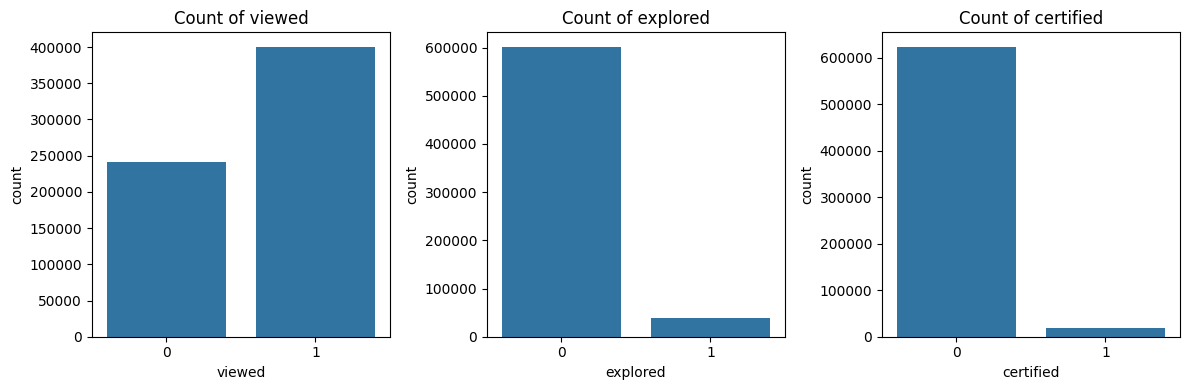

In [235]:
binary_vars = ['viewed', 'explored', 'certified']

fig, axes = plt.subplots(1, len(binary_vars), figsize=(12, 4))

for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout()
plt.show()

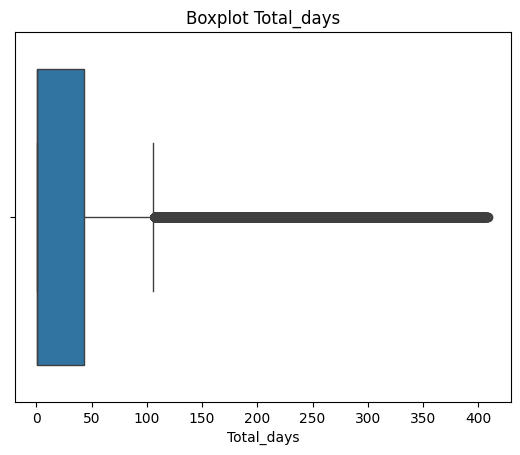

In [236]:
sns.boxplot(x=df['Total_days'])
plt.title("Boxplot Total_days")
plt.show()

## Analísis Univariante

In [237]:
df['active_engagement'] = (df['Total_days'] > 7) & (df['viewed'] == 1)
df['abandonment_delay'] = (df['last_event_DI'] - df['start_time_DI']).dt.days

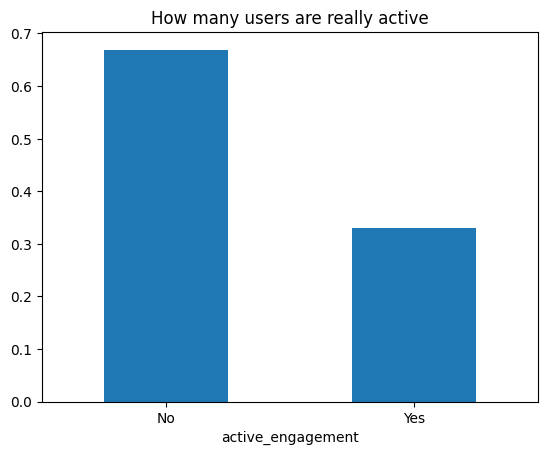

In [270]:
df['active_engagement'].value_counts(normalize=True).plot(kind='bar')
plt.title('How many users are really active')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0);

- La mayoría de los usuarios no alcanza un nivel de compromiso activo según la definición establecida. Aproximadamente solo el 33% de los usuarios pueden considerarse realmente activos, mientras que el 67% restante presenta un uso limitado o superficial de la plataforma.

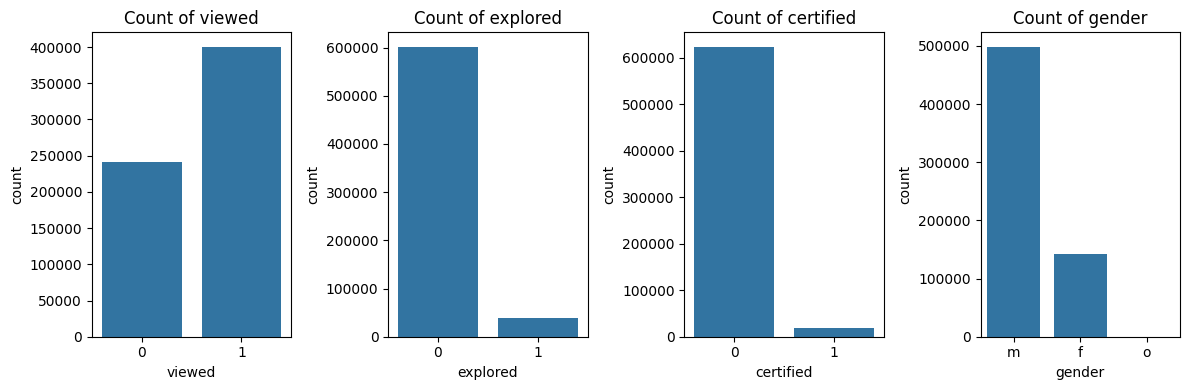

In [ ]:
vars = ['viewed', 'explored', 'certified','gender']

fig, axes = plt.subplots(1, len(vars), figsize=(12, 4))

for i, var in enumerate(vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout();

La mayoría de los usuarios ha visualizado al menos parte del contenido del curso (`viewed = 1`), pero solo una **minoría exploró contenido adicional** (`explored = 1`) y una **proporción aún menor obtuvo certificación** (`certified = 1`). Esto sugiere que, aunque el interés inicial en los cursos es alto, el compromiso profundo y la finalización exitosa son **considerablemente más bajos**, lo que puede indicar barreras en el seguimiento o finalización del curso. En cuanto al género, se observa una **clara mayoría de usuarios identificados como masculinos (`m`)**, seguidos por mujeres (`f`) y un grupo muy reducido no especificado (`o`).

Este análisis refuerza la necesidad de identificar factores que impulsen la retención y el compromiso más allá del primer contacto con la plataforma.

In [239]:
test_vars = ['viewed', 'explored', 'certified']
for var in test_vars:
    table = pd.crosstab(df[var], df['active_engagement'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\nTest: {var} vs active_engagement")
    print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Relación significativa ✅")
    else:
        print("No hay relación significativa ❌")



Test: viewed vs active_engagement
Chi² = 190537.77, p-value = 0.0000
Relación significativa ✅

Test: explored vs active_engagement
Chi² = 67567.25, p-value = 0.0000
Relación significativa ✅

Test: certified vs active_engagement
Chi² = 36091.62, p-value = 0.0000
Relación significativa ✅


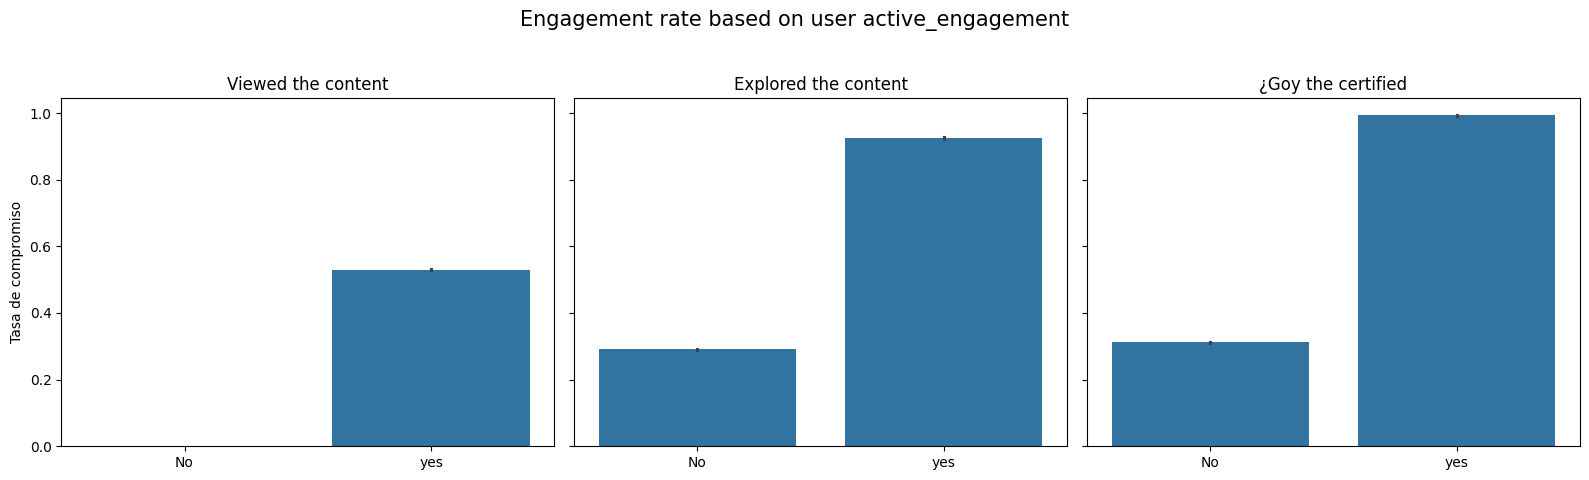

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# 1. Engagement por viewed
sns.barplot(x='viewed', y='active_engagement', data=df, ax=axes[0])
axes[0].set_title('Viewed the content')
axes[0].set_xticklabels(['No', 'yes'])
axes[0].set_ylabel('Tasa de compromiso')
axes[0].set_xlabel('')

# 2. Engagement por explored
sns.barplot(x='explored', y='active_engagement', data=df, ax=axes[1])
axes[1].set_title('Explored the content')
axes[1].set_xticklabels(['No', 'yes'])
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# 3. Engagement por certified
sns.barplot(x='certified', y='active_engagement', data=df, ax=axes[2])
axes[2].set_title('Got the certified')
axes[2].set_xticklabels(['No', 'yes'])
axes[2].set_ylabel('')
axes[2].set_xlabel('')

plt.suptitle('Engagement rate based on user active_engagement', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

### Todas las variables (viewed, explored, certified) están significativamente asociadas con el compromiso del usuario (active_engagement):

- viewed vs active_engagement: los usuarios que visualizaron contenido tienen más probabilidades de estar comprometidos activamente que los que no lo hicieron.
- explored vs active_engagement: los usuarios que exploraron más allá del mínimo requerido tienen una probabilidad altísima de estar comprometidos.
- certified vs active_engagement:los usuarios que completan el curso y obtienen certificados están fuertemente asociados al compromiso activo.

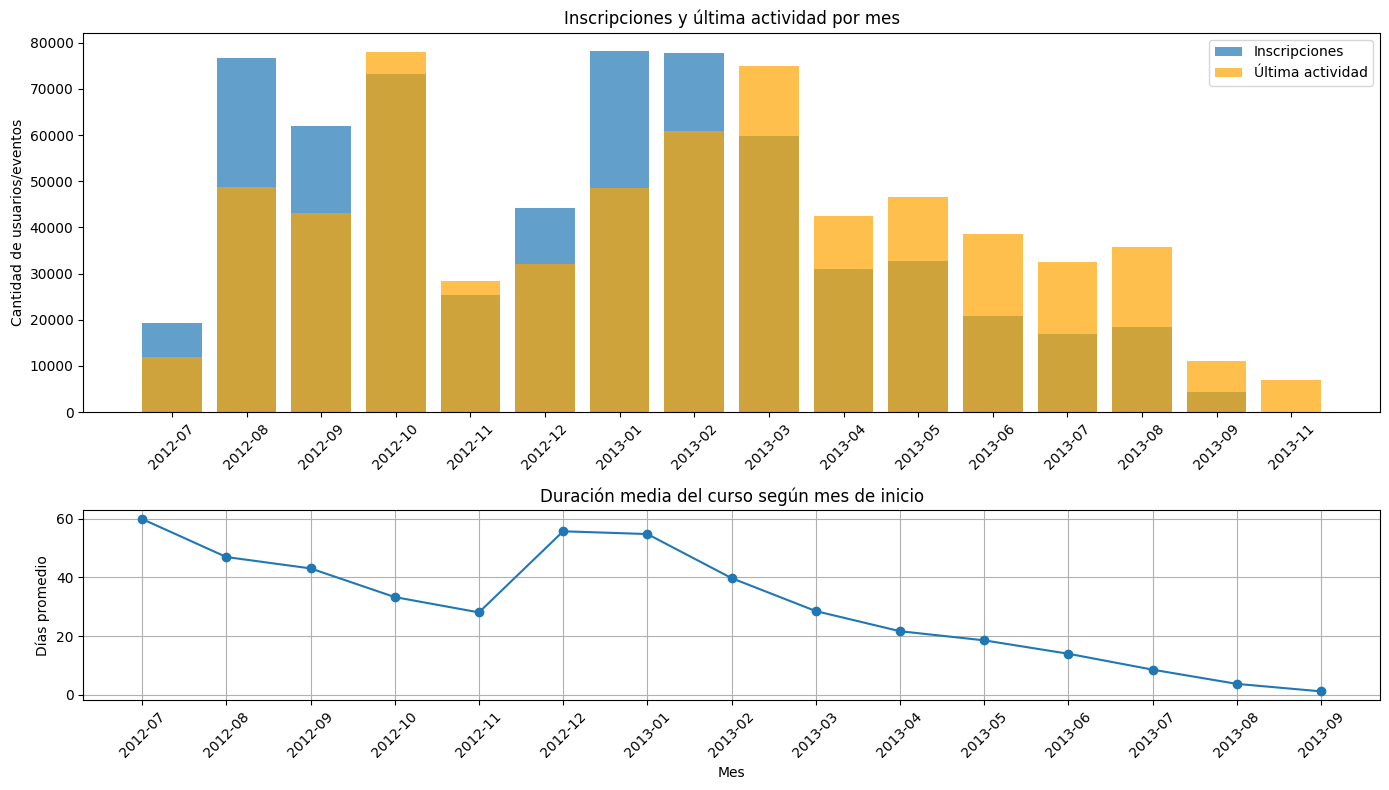

In [ ]:
df['start_month'] = df['start_time_DI'].dt.to_period('M')
df['end_month'] = df['last_event_DI'].dt.to_period('M')

start_counts = df['start_month'].value_counts().sort_index()
end_counts = df['end_month'].value_counts().sort_index()
avg_duration = df.groupby('start_month')['Total_days'].mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [2, 1]})

# Inscripciones por mes
axes[0].bar(start_counts.index.astype(str), start_counts.values, label='Registration', alpha=0.7)
axes[0].bar(end_counts.index.astype(str), end_counts.values, color='orange', label='Last activity', alpha=0.7)
axes[0].set_title('Registration and last activity for month')
axes[0].set_ylabel('Quantity of users')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Duración media
axes[1].plot(avg_duration.index.astype(str), avg_duration.values, marker='o', linestyle='-')
axes[1].set_title('Average course duration according to start month')
axes[1].set_ylabel('Average days')
axes[1].set_xlabel('Month')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout();

In [244]:
grouped = df.groupby('start_month')
durations_by_month = [group['Total_days'].values for name, group in grouped if len(group) > 1000]

stat, p = f_oneway(*durations_by_month)
print("ANOVA - Diferencias de duración por mes de inicio")
print(f"Estadístico F = {stat:.2f}, p-value = {p:.4f}")

ANOVA - Diferencias de duración por mes de inicio
Estadístico F = 2145.77, p-value = 0.0000


- Existe una diferencia estadísticamente significativa en la duración de uso de la plataforma según el mes de inscripción. Esto sugiere que factores temporales (como época del año, disponibilidad, estacionalidad educativa, vacaciones, etc.) podrían estar influyendo en el engagement de los usuarios.

In [245]:
df['start_quarter'] = df['start_time_DI'].dt.to_period('Q')

table = pd.crosstab(df['start_quarter'], df['certified'])
chi2, p, dof, _ = chi2_contingency(table)

print("Chi² =", chi2, "p-value =", p)

Chi² = 1330.8330483016425 p-value = 6.871019026587132e-287


- Existe una asociación significativa entre el trimestre de inicio y la probabilidad de obtener un certificado. Esto sugiere que la época del año en que los usuarios se inscriben influye en su éxito en completar el curso. Puede estar relacionado con motivación estacional, carga académica, tiempo disponible, etc.

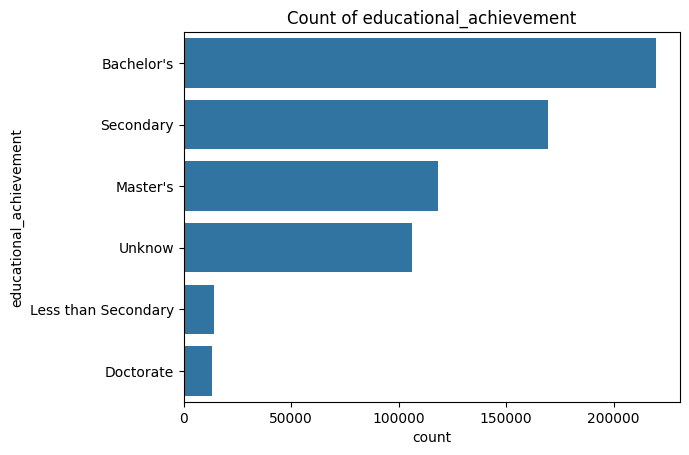

In [ ]:
sns.countplot(y='educational_achievement', data=df, order=df['educational_achievement'].value_counts().index)
plt.title('Count of educational_achievement');

In [247]:
groups = [df[df['educational_achievement'] == level]['Total_days'] for level in df['educational_achievement'].unique()]
stat, p = f_oneway(*groups)

print("ANOVA – Duración por nivel educativo")
print(f"F = {stat:.2f}, p = {p:.4f}")

ANOVA – Duración por nivel educativo
F = 747.38, p = 0.0000


- La duración media del uso de la plataforma varía significativamente según el nivel educativo del usuario. Esto sugiere que factores como experiencia académica o hábitos de estudio pueden estar influyendo en el tiempo de permanencia en los cursos.

In [ ]:
table = pd.crosstab(df['educational_achievement'], df['active_engagement'])
chi2, p, dof, _ = chi2_contingency(table)

print("Chi2 =", chi2, "p =", p)

Chi² = 3353.664133688507 p = 0.0


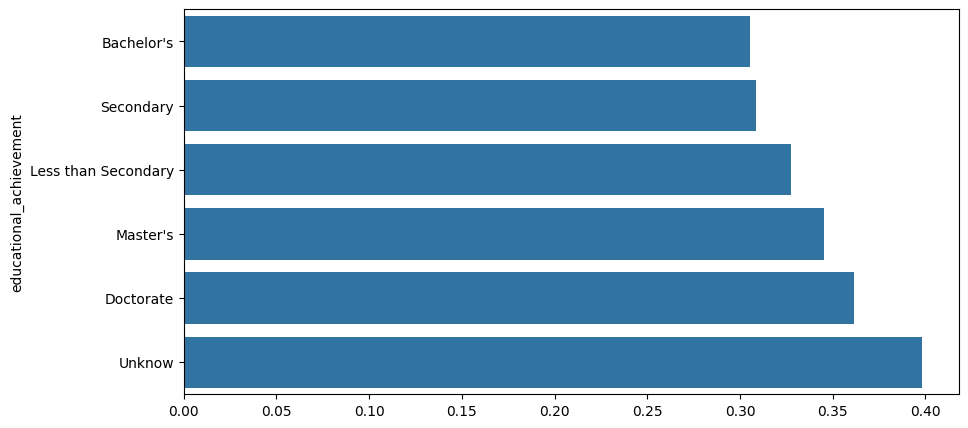

In [267]:
engagement_rate = df.groupby('educational_achievement')['active_engagement'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=engagement_rate.values, y=engagement_rate.index);

- El compromiso activo de los usuarios está significativamente asociado con su nivel educativo previo, como lo confirma el test Chi-cuadrado. Esto implica que ciertos niveles educativos presentan una mayor proporción de usuarios comprometidos, lo cual puede tener implicaciones en cómo se personalizan los contenidos o se definen enfoques estratégicos.

- Como se observa en el gráfico, usuarios con estudios de posgrado (Master’s y Doctorate) muestran tasas de compromiso ligeramente superiores, mientras que el grupo con nivel "Unknown" sorprendentemente presenta la tasa más alta. Esto podría indicar que existen segmentos con comportamientos atípicos que vale la pena investigar más a fondo (por ejemplo, usuarios que no completaron su perfil, pero sí utilizaron activamente la plataforma).

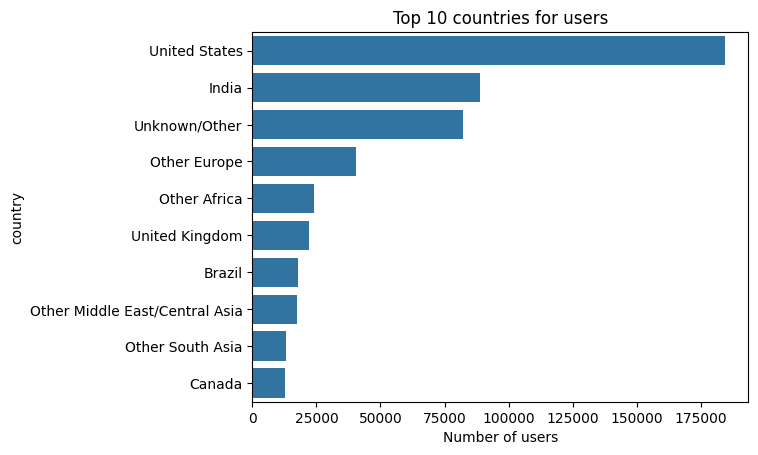

In [ ]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 countries for users')
plt.xlabel('Number of users');

- Vemos que la gran mayoria de los usuarios son USA, India y Unknow.

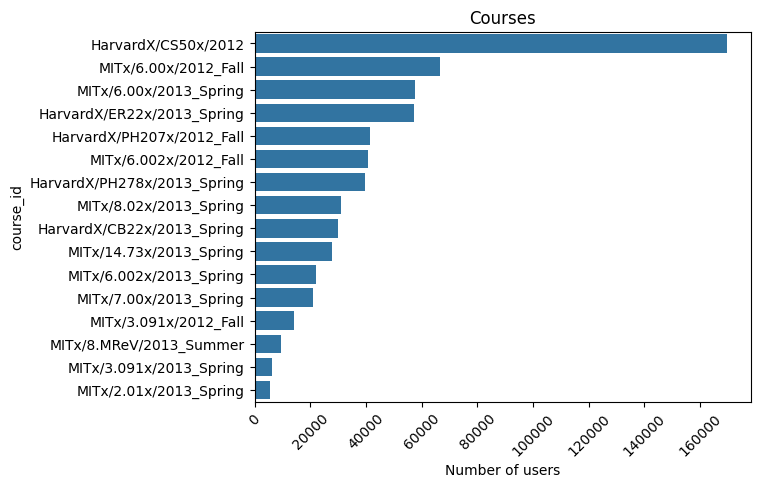

In [293]:
top_courses = df['course_id'].value_counts()
sns.barplot(x=top_courses.values, y=top_courses.index)
plt.title('Courses')
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Number of users');

In [290]:
df.groupby('course_id')['active_engagement'].mean().sort_values(ascending=False)

course_id
MITx/2.01x/2013_Spring         0.539453
MITx/7.00x/2013_Spring         0.445999
MITx/8.02x/2013_Spring         0.444634
MITx/6.00x/2012_Fall           0.438567
MITx/8.MReV/2013_Summer        0.427139
MITx/3.091x/2013_Spring        0.408047
MITx/14.73x/2013_Spring        0.406172
HarvardX/PH207x/2012_Fall      0.401568
MITx/6.00x/2013_Spring         0.394334
MITx/6.002x/2012_Fall          0.390458
MITx/3.091x/2012_Fall          0.369258
HarvardX/CB22x/2013_Spring     0.358943
HarvardX/ER22x/2013_Spring     0.356722
MITx/6.002x/2013_Spring        0.317293
HarvardX/PH278x/2013_Spring    0.302687
HarvardX/CS50x/2012            0.162987
Name: active_engagement, dtype: float64

In [277]:
table = pd.crosstab(df['course_id'], df['active_engagement'])
chi2, p, _, _ = chi2_contingency(table)
print("Chi2 =", chi2, "p =", p)

Chi2 = 33744.59034613374 p = 0.0


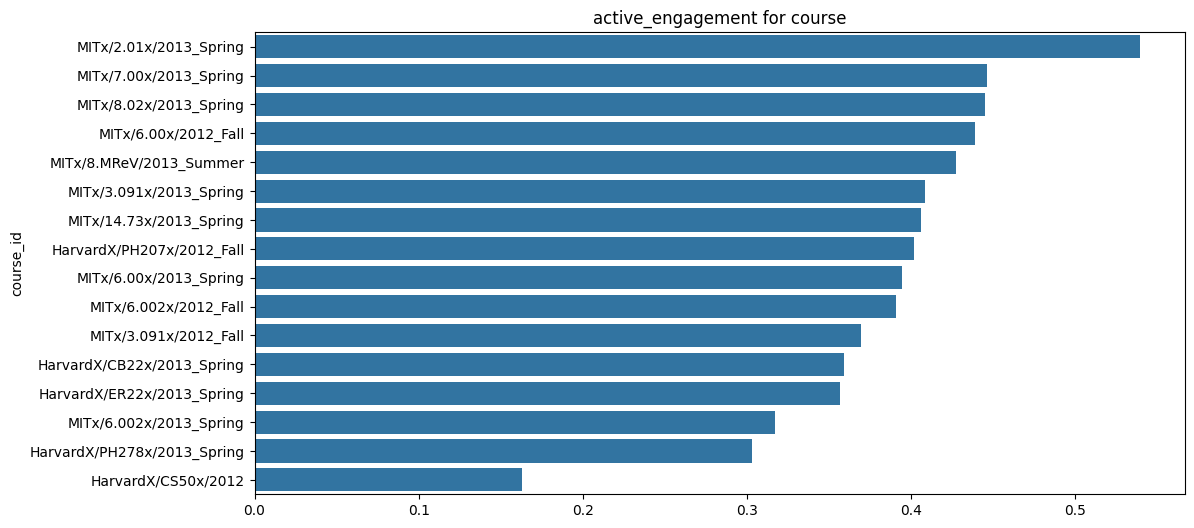

In [ ]:
course_act = df.groupby('course_id')['active_engagement'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.title('Active_engagement for course')
sns.barplot(y=course_act.index,x=course_act.values);

- El test Chi-cuadrado muestra una relación estadísticamente significativa entre el curso (course_id) y el compromiso activo del usuario (active_engagement). Esto significa que el nivel de engagement no es igual en todos los cursos y que el tipo de curso tiene un impacto relevante en el comportamiento de los usuarios.

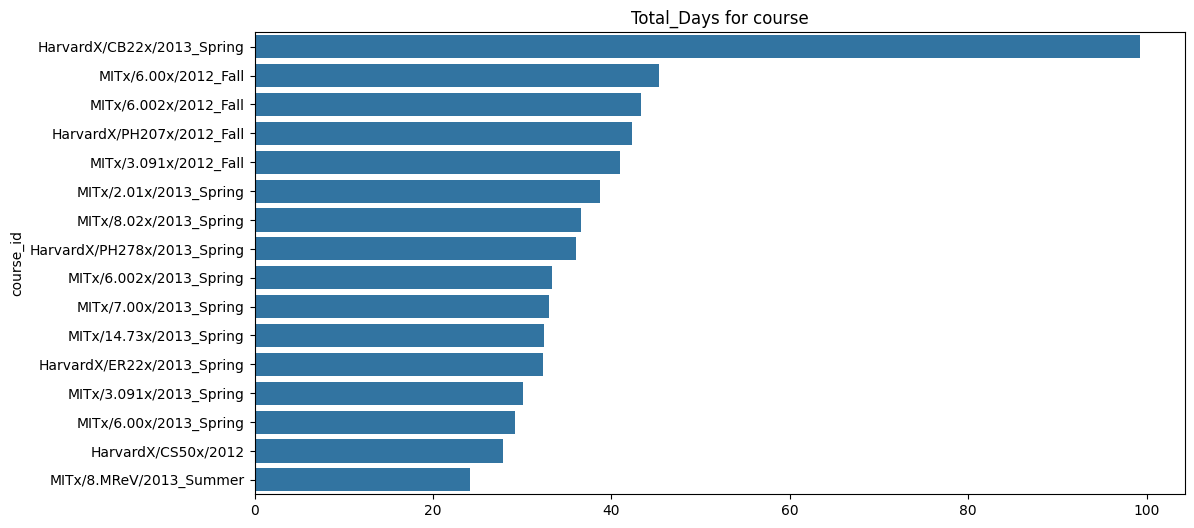

In [296]:
course_totald = df.groupby('course_id')['Total_days'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.title('Total_Days for course')
sns.barplot(y=course_totald.index,x=course_totald.values);

- Cursos como MITx/2.01x/2013_Spring y MITx/7.00x/2013_Spring lideran en tasa de engagement, pero no figuran entre los cursos con mayor duración de actividad. Esto sugiere que logran activar al usuario rápidamente, aunque no necesariamente lo retienen por muchos días, o bien podrían tratarse de cursos más cortos en sí mismos.

- En contraste, HarvardX/CB22x/2013_Spring y MITx/6.00x/2012_Fall presentan las mayores duraciones promedio, con usuarios que permanecen cerca de 100 días activos, pero con tasas de compromiso más moderadas.

- Llama especialmente la atención HarvardX/CS50x/2012, el curso más popular por volumen de usuarios, que presenta una de las tasas de engagement más bajas y una duración también reducida. Esto indica que, a pesar de su alcance masivo, una gran parte de los usuarios no permanece activa ni interactúa sostenidamente con el contenido.

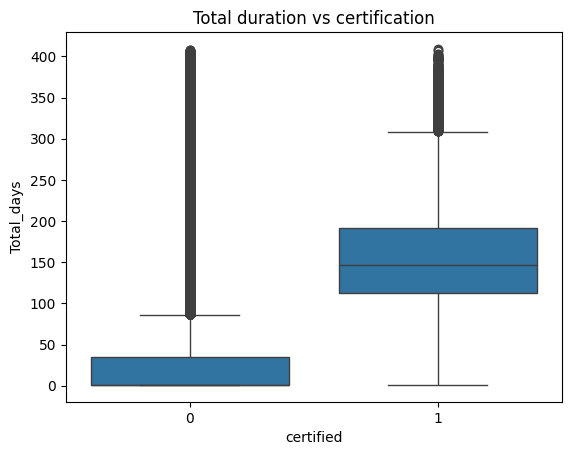

In [251]:
sns.boxplot(x='certified', y='Total_days', data=df)
plt.title('Total duration vs certification');

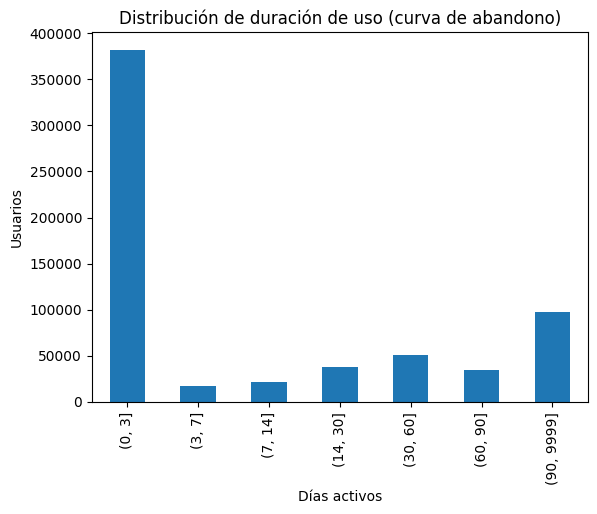

In [255]:
df['days_bucket'] = pd.cut(df['Total_days'], bins=[0,3,7,14,30,60,90,9999])
df['days_bucket'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de duración de uso (curva de abandono)')
plt.xlabel('Días activos')
plt.ylabel('Usuarios');

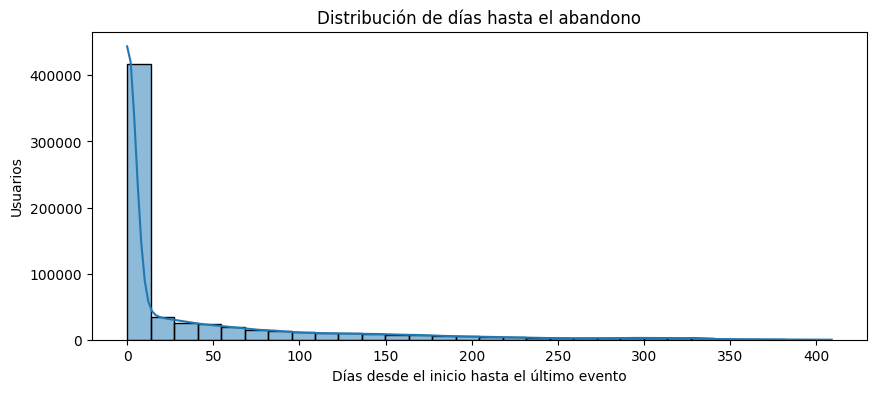

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['abandonment_delay'], bins=30, kde=True)
plt.title('Distribución de días hasta el abandono')
plt.xlabel('Días desde el inicio hasta el último evento')
plt.ylabel('Usuarios');